# Data Preprocessing

In [1]:
import pandas as pd
df = pd.read_csv('AER_credit_card_data.csv')
col_names = df.columns.tolist()
print("Column names:")
print(col_names)

print("\nSample data:")
df.head()

Column names:
['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner', 'selfemp', 'dependents', 'months', 'majorcards', 'active']

Sample data:


,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [2]:
df['card'].unique()

array(['yes', 'no'], dtype=object)

In [3]:
import numpy as np
df['card']=np.where(df['card'] =='yes', 1, df['card'])
df['card']=np.where(df['card'] =='no', 0, df['card'])
df1 = pd.to_numeric(df['card'])
df['card'] = df1

In [4]:
df['card'].unique()

array([1, 0], dtype=int64)

In [5]:
df.dtypes

card             int64
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [6]:
df.isnull().any()

card           False
reports        False
age            False
income         False
share          False
expenditure    False
owner          False
selfemp        False
dependents     False
months         False
majorcards     False
active         False
dtype: bool

In [7]:
df.shape

(1319, 12)

# Data Exploration

In [8]:
df['card'].value_counts()

1    1023
0     296
Name: card, dtype: int64

In [9]:
df.groupby('card').mean()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
card,,,,,,,,,
0,1.587838,33.202984,3.068509,0.000477,0.000000,1.077703,55.300676,0.739865,6.054054
1,0.129032,33.216031,3.451273,0.088482,238.602421,0.969697,55.258065,0.839687,7.269795


In [10]:
df.groupby('owner').mean()

,card,reports,age,income,share,expenditure,dependents,months,majorcards,active
owner,,,,,,,,,,
no,0.720867,0.520325,29.904810,2.877435,0.070056,162.559447,0.651762,41.239837,0.795393,5.459350
yes,0.845095,0.375215,37.415376,3.985171,0.067051,213.634086,1.428571,73.086059,0.845095,8.950086


In [11]:
df.groupby('selfemp').mean()

,card,reports,age,income,share,expenditure,dependents,months,majorcards,active
selfemp,,,,,,,,,,
no,0.781759,0.449511,32.935939,3.313615,0.070765,187.696948,0.979642,54.078990,0.816775,6.946254
yes,0.692308,0.549451,36.953296,4.063865,0.041306,149.433234,1.186813,71.307692,0.824176,7.681319


# Data Visualization

Text(0, 0.5, 'Frequency of Approval')

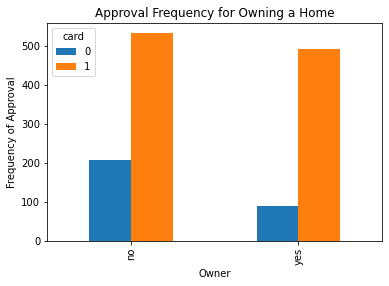

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(df.owner,df.card).plot(kind='bar')
plt.title('Approval Frequency for Owning a Home')
plt.xlabel('Owner')
plt.ylabel('Frequency of Approval')

Text(0, 0.5, 'Proportion of Approval')

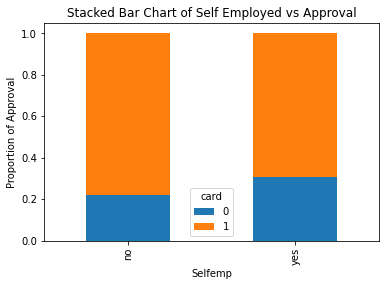

In [13]:
table=pd.crosstab(df.selfemp, df.card)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Self Employed vs Approval')
plt.xlabel('Selfemp')
plt.ylabel('Proportion of Approval')

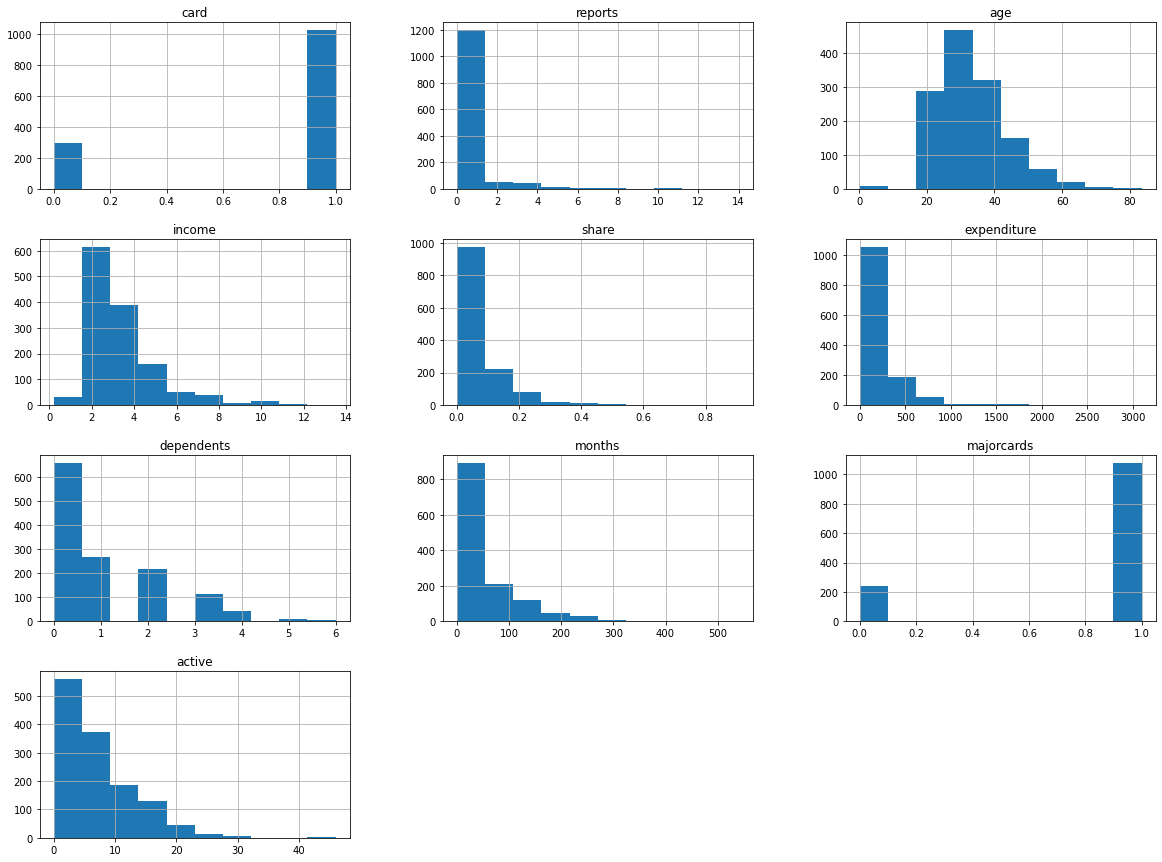

In [14]:
num_bins = 10

df.hist(bins=num_bins, figsize=(20,15))
plt.savefig("df_histogram_plots")
plt.show()

# Creating Dummy Variables for Categorical Variables

In [15]:
cat_vars=['owner','selfemp']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1
    
cat_vars=['owner','selfemp']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

In [16]:
df_final=df[to_keep]
df_final.columns.values

array(['card', 'reports', 'age', 'income', 'share', 'expenditure',
       'dependents', 'months', 'majorcards', 'active', 'owner_no',
       'owner_yes', 'selfemp_no', 'selfemp_yes'], dtype=object)

# Over-sampling using SMOTE

In [17]:
X = df_final.loc[:, df_final.columns != 'card']
y = df_final.loc[:, df_final.columns == 'card']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=42)
columns = X.columns

os_data_X,os_data_y= os.fit_sample(X, y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['card'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no card in oversampled data",len(os_data_y[os_data_y['card']==0]))
print("Number of card",len(os_data_y[os_data_y['card']==1]))
print("Proportion of no card data in oversampled data is ",len(os_data_y[os_data_y['card']==0])/len(os_data_X))
print("Proportion of card data in oversampled data is ",len(os_data_y[os_data_y['card']==1])/len(os_data_X))

length of oversampled data is  2046
Number of no card in oversampled data 1023
Number of card 1023
Proportion of no card data in oversampled data is  0.5
Proportion of card data in oversampled data is  0.5


In [18]:
X=os_data_X
y=os_data_y

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# k-Nearest Neighbors

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 

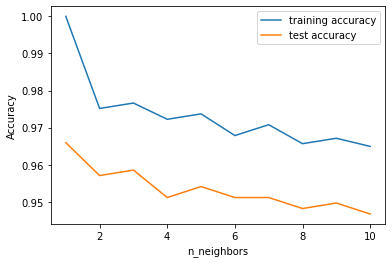

In [19]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [20]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred = knn.predict(X_test)
print('k-Nearest Neighbors accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))

k-Nearest Neighbors accuracy: 0.959


# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(random_state=42)

In [23]:
y_pred1 = rf.predict(X_test)
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred1)))

Random Forest Accuracy: 0.988


# Support Vector Machine

In [24]:
from sklearn.svm import SVC

svc = SVC(probability=True,random_state=42)
svc.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(probability=True, random_state=42)

In [25]:
y_pred2 = svc.predict(X_test)
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred2)))

Support vector machine accuracy: 0.941


# Cross Validation

In [26]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=42)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed

10-fold cross validation average accuracy: 0.989


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


# Precision and recall

## Random Forest

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       335
           1       1.00      0.98      0.99       341

    accuracy                           0.99       676
   macro avg       0.99      0.99      0.99       676
weighted avg       0.99      0.99      0.99       676



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


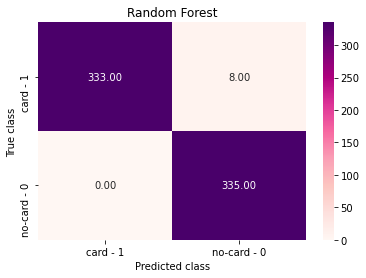

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

forest_cm = confusion_matrix(y_test ,y_pred1, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["card - 1", "no-card - 0"] , yticklabels = ["card - 1", "no-card - 0"],
           cmap='RdPu')

plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

## k-Nearest Neighbors

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       335
           1       1.00      0.92      0.96       341

    accuracy                           0.96       676
   macro avg       0.96      0.96      0.96       676
weighted avg       0.96      0.96      0.96       676



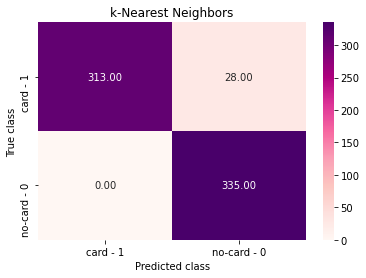

In [30]:
knn_cm = confusion_matrix(y_test ,y_pred, [1,0])
sns.heatmap(knn_cm, annot=True, fmt='.2f',xticklabels = ["card - 1", "no-card - 0"] , yticklabels = ["card - 1", "no-card - 0"],
           cmap='RdPu')

plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('k-Nearest Neighbors')
plt.savefig('k-NN')

## Support Vector Machine

In [31]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       335
           1       1.00      0.88      0.94       341

    accuracy                           0.94       676
   macro avg       0.95      0.94      0.94       676
weighted avg       0.95      0.94      0.94       676



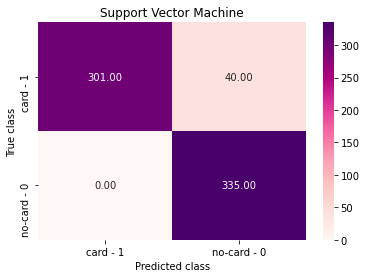

In [32]:
svc_cm = confusion_matrix(y_test, y_pred2, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["card - 1", "no-card - 0"] , yticklabels = ["card - 1", "no-card - 0"],
           cmap='RdPu')

plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

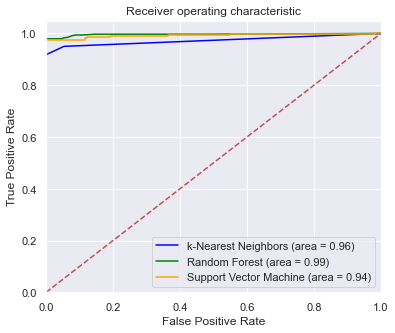

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

sns.set(style="darkgrid", color_codes=True)
plt.rcParams["figure.figsize"] = (6,5)

knn_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, y_pred1)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

svc_roc_auc = roc_auc_score(y_test, y_pred2)
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='k-Nearest Neighbors (area = %0.2f)' % knn_roc_auc, color='blue')
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc, color='green')
plt.plot(svc_fpr, svc_tpr, label='Support Vector Machine (area = %0.2f)' % svc_roc_auc, color='orange')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

# Feature Importance for Random Forest Model

In [34]:
feature_labels = np.array(['reports', 'age', 'income', 'share', 'expenditure', 'dependents',
                           'months', 'majorcards', 'active', 'owner_no', 'owner_yes', 
                           'selfemp_no','selfemp_yes'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

expenditure-47.95%
share-37.56%
reports-5.17%
owner_yes-2.00%
active-1.92%
majorcards-1.41%
age-1.22%
income-0.94%
months-0.81%
owner_no-0.45%
selfemp_no-0.22%
dependents-0.21%
selfemp_yes-0.15%
